# MNIST Dataset:

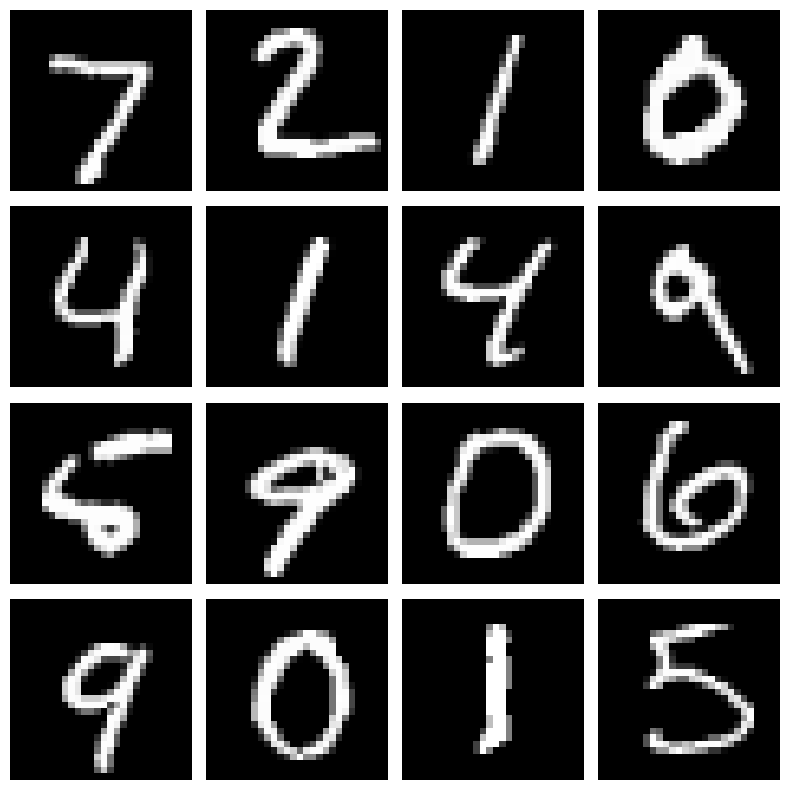

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print 16 images from the MNIST dataset with their predictions
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5326 - loss: 1.6304 - val_accuracy: 0.8394 - val_loss: 0.6795
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8410 - loss: 0.6435 - val_accuracy: 0.8750 - val_loss: 0.4824
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8733 - loss: 0.4813 - val_accuracy: 0.8923 - val_loss: 0.4070
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.4176 - val_accuracy: 0.9023 - val_loss: 0.3666
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8938 - loss: 0.3845 - val_accuracy: 0.9068 - val_loss: 0.3415
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9024 - loss: 0.3520 - val_accuracy: 0.9116 - val_loss: 0.3236
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9058 - loss: 0.3369 - val_accuracy: 0.9136 - val_loss: 0.3103
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9097 - loss: 0.3204 - val_accuracy: 0.

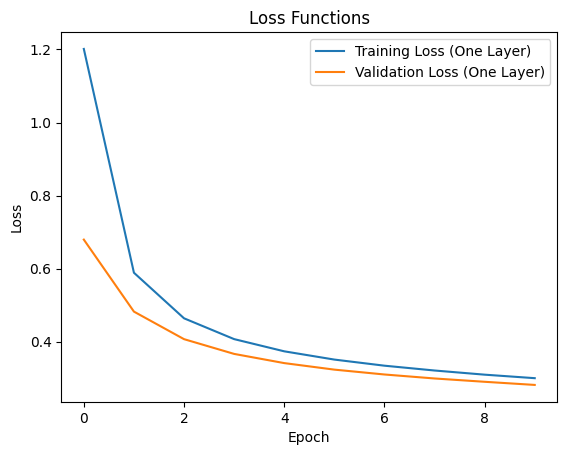

In [17]:
# Preprocess the data
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define a neural network with one layer
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# Compile and train the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Plot the loss function for training and validation sets
plt.plot(history.history['loss'], label='Training Loss (One Layer)')
plt.plot(history.history['val_loss'], label='Validation Loss (One Layer)')
plt.title('Loss Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


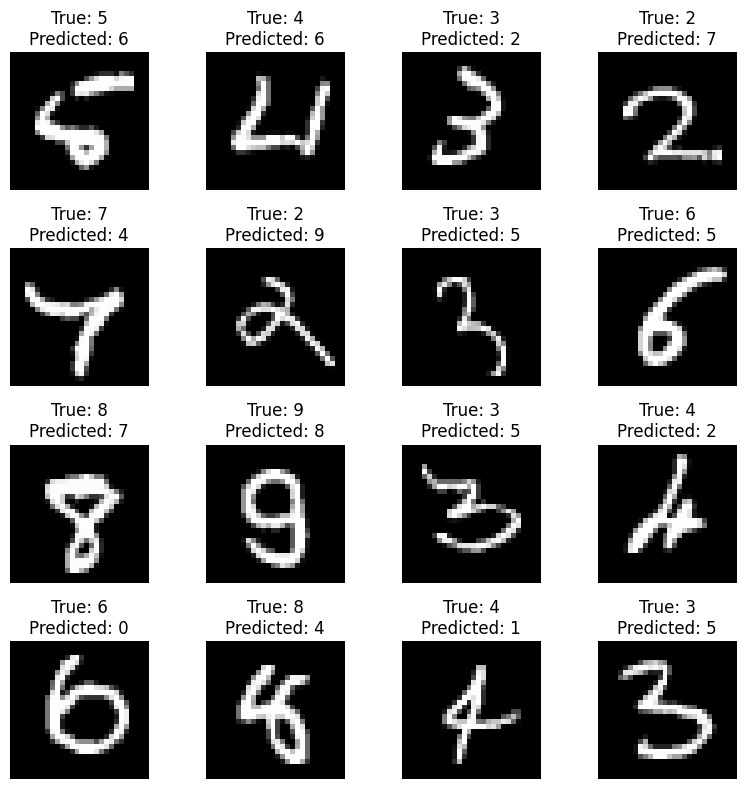

In [18]:
# Predict on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
y_trues = np.argmax(y_test, axis=1)

# Find misclassification examples
misclassified_indices = np.where(predicted_labels != y_trues)[0]

# Print the first 16 misclassification examples
num_examples = 16
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flatten()):
    image_index = misclassified_indices[i]
    image = x_test[image_index].reshape(28, 28)
    true_label = y_trues[image_index]
    predicted_label = predicted_labels[image_index]
    ax.imshow(image, cmap='gray')
    ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6277 - loss: 1.5753 - val_accuracy: 0.8794 - val_loss: 0.5153
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8783 - loss: 0.4817 - val_accuracy: 0.9029 - val_loss: 0.3666
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8985 - loss: 0.3719 - val_accuracy: 0.9127 - val_loss: 0.3182
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9092 - loss: 0.3277 - val_accuracy: 0.9181 - val_loss: 0.2915
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9155 - loss: 0.2965 - val_accuracy: 0.9255 - val_loss: 0.2689
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9244 - loss: 0.2694 - val_accuracy: 0.9289 - val_loss: 0.2537
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9271 - loss: 0.2615 - val_accuracy: 0.9325 - val_loss: 0.2426
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9312 - loss: 0.2457 - val_accuracy: 0.

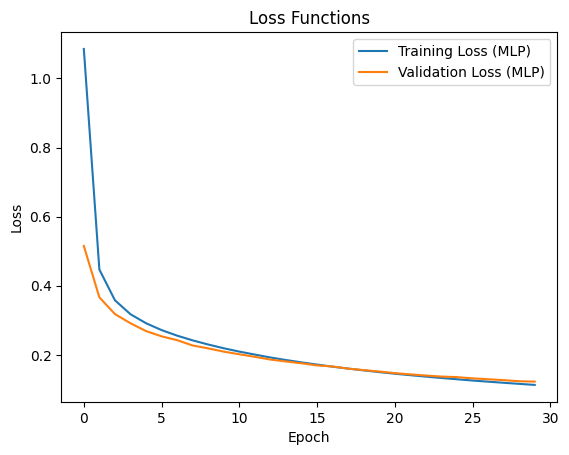

In [19]:
# Define a multi-layer perceptron (MLP) with more parameters
mlp_model = Sequential()
mlp_model.add(Dense(512, activation='relu', input_shape=(784,)))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))

# Compile and train the MLP model
mlp_model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
mlp_history = mlp_model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

plt.plot(mlp_history.history['loss'], label='Training Loss (MLP)')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss (MLP)')
plt.title('Loss Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


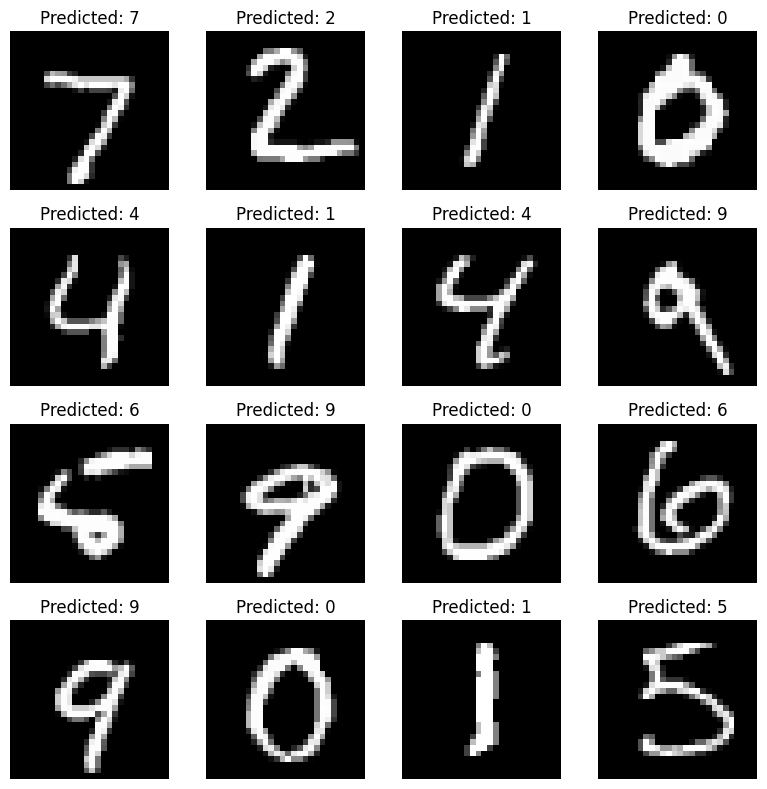

In [5]:
# Print 16 images from the MNIST dataset with their predictions
predictions = model.predict(x_test[:16])
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Predicted: {predicted_labels[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Dataset de noticias:

In [20]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd
import nltk
nltk.download('stopwords')

df_educacion = pd.read_csv("noticias_educacion_sample.csv")
df_educacion['clase'] = 0
df_politica = pd.read_csv("noticias_politica_sample.csv")
df_politica['clase'] = 1
df_deportes = pd.read_csv("noticias_deportes_sample.csv")
df_deportes['clase'] = 2
df_economia = pd.read_csv("noticias_economia_sample.csv")
df_economia['clase'] = 3
df = pd.concat([df_educacion, df_politica, df_deportes, df_economia]).dropna().reset_index()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.content, df.clase, test_size=0.2, random_state=42)

# Download the NLTK Spanish stopwords if you haven't already
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=2000, stop_words=spanish_stopwords, ngram_range=(1,5), lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

# Make predictions with Random Forest
rf_predictions = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Train a neural network with more layers and neurons
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_tfidf.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(df.clase), activation='softmax'))
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_tfidf.toarray(), y_train, batch_size=128, epochs=10, validation_data=(X_test_tfidf.toarray(), y_test))

# Make predictions with the neural network
nn_predictions = np.argmax(model.predict(X_test_tfidf.toarray()), axis=-1)
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy}")

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Random Forest Accuracy: 0.9276485788113695
Epoch 1/10


/opt/pytorch/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3825 - loss: 7.5092 - val_accuracy: 0.6460 - val_loss: 6.9877
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5960 - loss: 6.3108 - val_accuracy: 0.2817 - val_loss: 2.4782
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3411 - loss: 1.7629 - val_accuracy: 0.6408 - val_loss: 1.2616
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8068 - loss: 1.2215 - val_accuracy: 0.5607 - val_loss: 1.1173
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6563 - loss: 1.0336 - val_accuracy: 0.8966 - val_loss: 0.8051
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9259 - loss: 0.7007 - val_accuracy: 0.9044 - val_loss: 0.5203
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9429 - loss: 0.4248 - val_accuracy: 0.9276 - val_loss: 0.3251
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9544 - loss: 0.2637 - val_accuracy: 0.9354 - val_loss: 0.

# Overfitting and regularization:

/opt/pytorch/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


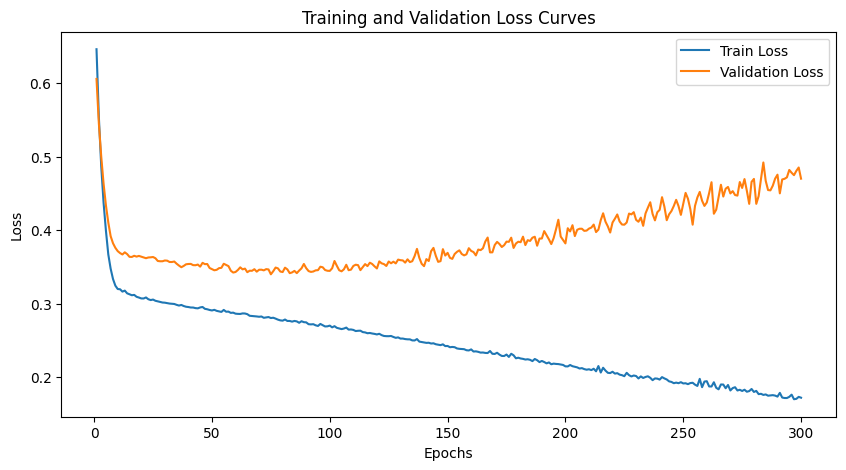

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

# Generate a synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP model
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the MLP model with increased epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, verbose=0)

# Extract training and validation losses from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()


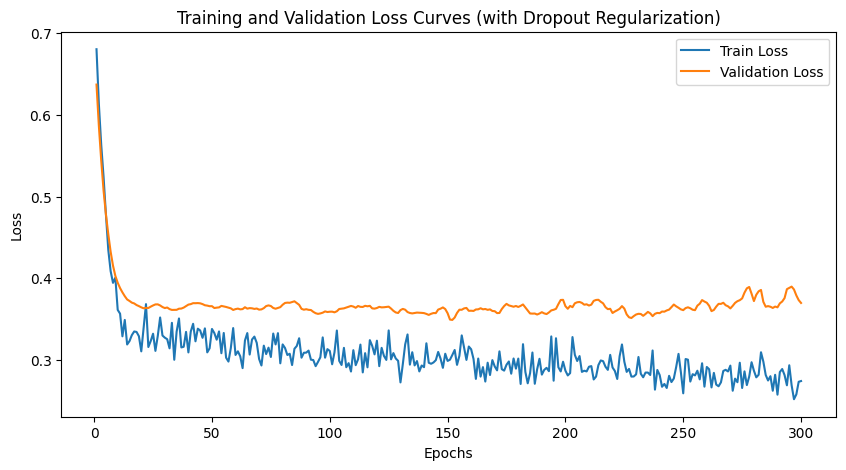

In [11]:
from keras.layers import Dense, Dropout

# Define the MLP model with dropout regularization
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with dropout rate of 0.5
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with dropout rate of 0.5
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the MLP model with increased epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, verbose=0)

# Extract training and validation losses from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves (with Dropout Regularization)')
plt.legend()
plt.show()

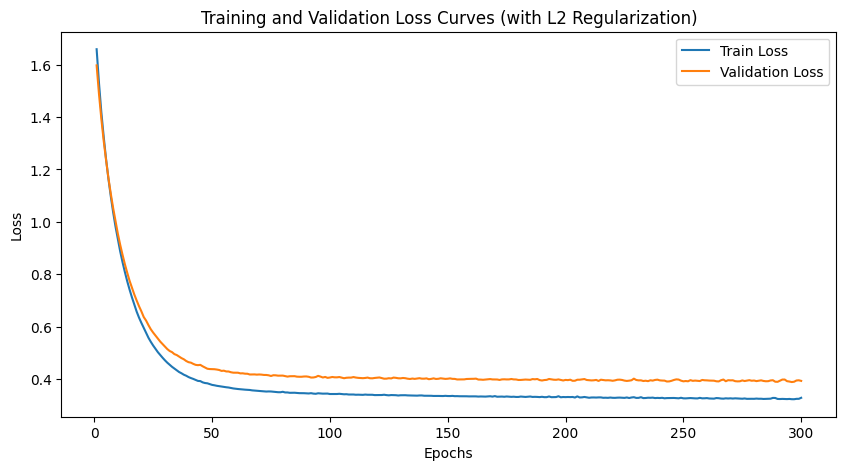

In [12]:
from keras import regularizers

# Define the MLP model with L2 regularization
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the MLP model with increased epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, verbose=0)

# Extract training and validation losses from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves (with L2 Regularization)')
plt.legend()
plt.show()

# CIFAR Dataset

CIFAR classes: 1. Airplane, 2.Automobile, 3.Bird, 4.Cat, 5.Deer, 6.Dog, 7.Frog, 8.Horse, 9.Ship, 10.Truck

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


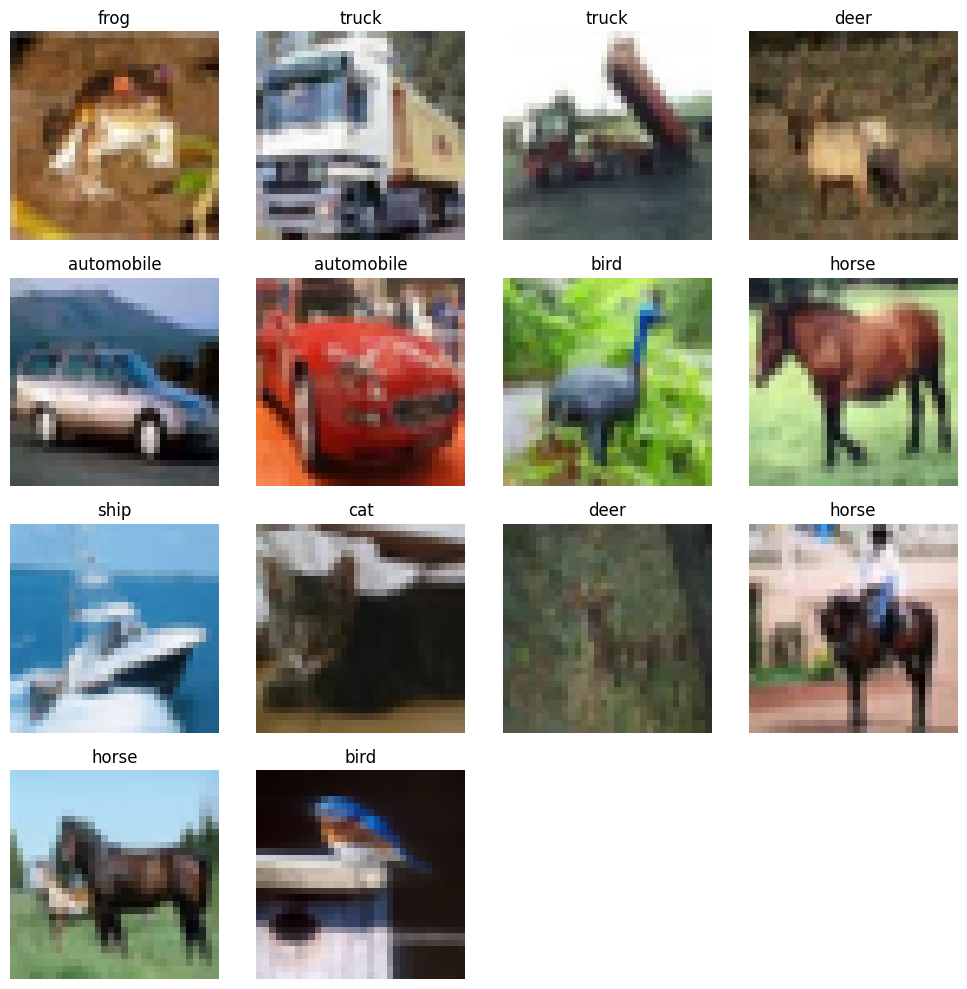

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train, y_train), (_, _) = cifar10.load_data()

# Define the class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the example images
plt.figure(figsize=(10, 10))
for i in range(14):
    image = X_train[i]
    label = class_labels[y_train[i][0]]
    
    plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train_nn = to_categorical(y_train, num_classes=10)
y_test_nn = to_categorical(y_test, num_classes=10)

# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Create a neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3072,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_nn, epochs=10, batch_size=32, validation_data=(X_test, y_test_nn))

# Evaluate the model
_, nn_accuracy = model.evaluate(X_test, y_test_nn)
print("Neural Network Accuracy:", nn_accuracy)

# Make predictions using the Neural Network
nn_pred = model.predict(X_test)
nn_pred_labels = np.argmax(nn_pred, axis=1)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train, y_train.ravel())

# Make predictions using Random Forest
rf_pred = rf.predict(X_test)

# Evaluate the Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Calculate precision, recall, and F1-score for each class
target_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
nn_report = classification_report(np.argmax(y_test_nn, axis=1), nn_pred_labels, target_names=target_names)
rf_report = classification_report(y_test, rf_pred, target_names=target_names)

print("Neural Network Classification Report:")
print(nn_report)

print("Random Forest Classification Report:")
print(rf_report)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2715 - loss: 1.9893 - val_accuracy: 0.3590 - val_loss: 1.7601
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3747 - loss: 1.7422 - val_accuracy: 0.4057 - val_loss: 1.6501
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4062 - loss: 1.6561 - val_accuracy: 0.4117 - val_loss: 1.6468
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4183 - loss: 1.6258 - val_accuracy: 0.4180 - val_loss: 1.6236
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4287 - loss: 1.5901 - val_accuracy: 0.4330 - val_loss: 1.5915
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4394 - loss: 1.5608 - val_accuracy: 0.4313 - val_loss: 1.6016
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4437 - loss: 1.5526 - val_accuracy: 0.4242 - val_loss: 1.6220
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4510 - loss: 1.5288 - 